In [160]:
import pandas as pd 
import numpy as np
#from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
#import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pickle
import matlab.engine


csvfile = "sim_data_2l.csv"  #file name 


In [161]:
data_prop= pd.read_csv(csvfile,names=["z",'rho','rpm','dia','dhub','thrust','vel_ship','cd1','cd2','cd3','cd4','cd5','cd6','cd7','cd8','cd9','cd10','kt','eff','power','eff1','eff2'])
#data_prop= pd.read_csv(csvfile)
data_prop.head()
data_prop.describe()

,z,rho,rpm,dia,dhub,thrust,vel_ship,cd1,cd2,cd3,...,cd6,cd7,cd8,cd9,cd10,kt,eff,power,eff1,eff2
count,205556.0,205556.0,205556.000000,205556.000000,205556.000000,205556.000000,205556.000000,205556.000000,205556.000000,2.055560e+05,...,205556.000000,2.055560e+05,2.055560e+05,205556.000000,2.055560e+05,205556.000000,205556.000000,2.055560e+05,205556.000000,205556.000000
mean,3.0,1000.0,987.100814,2.763022,0.469714,238812.883166,14.007653,0.249490,0.248792,2.479375e-01,...,0.241683,2.368916e-01,2.387377e-01,0.238090,2.000000e-03,0.125161,0.642565,5.371654e+06,0.642565,0.642565
std,0.0,0.0,1108.600307,1.953460,0.332088,156611.663602,4.213485,0.141833,0.142498,1.432044e-01,...,0.144482,1.442214e-01,1.447611e-01,0.144785,1.301046e-18,0.097173,0.093106,4.126148e+06,0.093106,0.093106
min,3.0,1000.0,50.000000,0.200250,0.034043,101.000000,0.858620,0.000001,0.000001,4.910000e-07,...,0.000002,4.870000e-07,9.770000e-08,0.000007,2.000000e-03,0.006613,0.500000,6.644900e+02,0.499970,0.499920
25%,3.0,1000.0,206.000000,1.299100,0.220840,81205.750000,11.026000,0.128670,0.127390,1.254700e-01,...,0.115230,1.103400e-01,1.116900e-01,0.111088,2.000000e-03,0.060349,0.560340,1.680000e+06,0.560340,0.560350
50%,3.0,1000.0,559.000000,2.180100,0.370620,244000.000000,14.711000,0.249240,0.248025,2.463550e-01,...,0.237710,2.306500e-01,2.333300e-01,0.232050,2.000000e-03,0.096531,0.633060,4.690000e+06,0.633060,0.633060
75%,3.0,1000.0,1354.000000,3.739200,0.635660,381000.000000,17.569000,0.370410,0.370030,3.706200e-01,...,0.365650,3.598600e-01,3.627600e-01,0.362190,2.000000e-03,0.155630,0.719670,8.320000e+06,0.719670,0.719660
max,3.0,1000.0,6000.000000,9.998400,1.699700,500000.000000,20.000000,0.500000,0.500000,5.000000e-01,...,0.500000,5.000000e-01,5.000000e-01,0.500000,2.000000e-03,0.782730,0.897980,1.970000e+07,0.897980,0.897980


In [162]:
design_input = data_prop[['thrust','vel_ship','rpm']]
design_output = data_prop[['cd1','cd2','cd3','cd4','cd5','cd6','cd7','cd8','cd9','cd10','dia','dhub','eff']]

design_input.head()

,thrust,vel_ship,rpm
0,98261.0,14.420,113
1,357000.0,18.957,150
2,47749.0,11.882,114
3,31907.0,14.414,95
4,32936.0,16.306,76


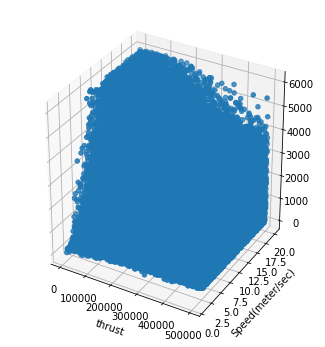

'\n#fig = plt.figure(figsize=(12,6))\n#plt.scatter(X[:,0], X[:,1])\nfig=plt.figure(figsize=(12,8))\nplt.scatter(data_prop["thrust"],data_prop[\'vel_ship\'],label=\'Line 2\')\nplt.grid(color=\'r\', linestyle=\'-\', linewidth=0.5)\nplt.title("Failed cases")\nplt.xlabel("thrust")\nplt.ylabel("ship velocity")\nplt.show()\n'

In [136]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import colors


fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')
sc=ax.scatter(data_prop["thrust"], data_prop['vel_ship'], data_prop['rpm'],
                cmap='gnuplot2')
plt.xlabel('thrust')
plt.ylabel('Speed(meter/sec)')
plt.show()

#plt.zlabel('Books Read')
#plt.savefig('books_read.png')
"""
#fig = plt.figure(figsize=(12,6))
#plt.scatter(X[:,0], X[:,1])
fig=plt.figure(figsize=(12,8))
plt.scatter(data_prop["thrust"],data_prop['vel_ship'],label='Line 2')
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title("Failed cases")
plt.xlabel("thrust")
plt.ylabel("ship velocity")
plt.show()
"""

In [155]:
design_output.head()

,cd1,cd2,cd3,cd4,cd5,cd6,cd7,cd8,cd9,cd10,dia,dhub,eff
0,0.14292,0.298110,0.405910,0.097312,0.170490,0.068497,0.123110,0.011810,0.008962,0.002,8.0452,1.3677,0.51674
1,0.39261,0.154980,0.260930,0.055959,0.188840,0.021167,0.038728,0.188410,0.003038,0.002,9.6348,1.6379,0.51541
2,0.35336,0.022888,0.079184,0.050021,0.000767,0.071522,0.115760,0.022991,0.199680,0.002,6.6625,1.1326,0.52871
3,0.32207,0.267490,0.045987,0.256790,0.217110,0.026001,0.059030,0.013855,0.128290,0.002,6.5207,1.1085,0.52990
4,0.40584,0.064041,0.440060,0.036595,0.362250,0.012785,0.033016,0.017153,0.089521,0.002,7.3355,1.2470,0.52218


In [163]:
x_train, x_test, y_train, y_test = train_test_split(design_input , design_output, test_size=0.1)
y_train


,cd1,cd2,cd3,cd4,cd5,cd6,cd7,cd8,cd9,cd10,dia,dhub,eff
147386,0.473530,0.234340,0.462370,0.392200,0.010482,0.103480,0.251280,0.229910,0.082912,0.002,0.42568,0.072366,0.61507
173264,0.173100,0.069343,0.063396,0.292660,0.184250,0.244680,0.334230,0.110780,0.195070,0.002,3.49480,0.594120,0.76043
119901,0.175600,0.195100,0.305270,0.219280,0.464230,0.483630,0.180210,0.037035,0.168950,0.002,1.82580,0.310390,0.58118
55411,0.417860,0.120660,0.445130,0.405890,0.089058,0.335400,0.181250,0.419110,0.333240,0.002,6.19770,1.053600,0.73611
72460,0.049126,0.283350,0.163530,0.060838,0.271580,0.067776,0.174960,0.385450,0.132910,0.002,2.12720,0.361620,0.59622
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84338,0.316850,0.398270,0.223830,0.374230,0.310210,0.172230,0.156770,0.226000,0.472690,0.002,1.43390,0.243760,0.66407
33336,0.412370,0.273290,0.468660,0.414740,0.497220,0.342850,0.349010,0.362050,0.375290,0.002,4.02240,0.683810,0.56519
193127,0.415340,0.044140,0.250530,0.405980,0.165010,0.403620,0.074716,0.438770,0.167720,0.002,1.53440,0.260850,0.70896
171038,0.447700,0.043473,0.236120,0.055971,0.142070,0.339440,0.446500,0.103950,0.386640,0.002,2.05150,0.348750,0.64879


In [164]:
model=RandomForestRegressor(n_estimators=100,n_jobs=-1)
model.fit(np.array(x_train),np.array(y_train))

RandomForestRegressor(n_jobs=-1)

In [185]:
#Code to save the trained model
with open('rfmodel_prop_2l', 'wb') as f:
    pickle.dump(model, f)

In [8]:
with open('rfmodel_prop_2l', 'rb') as f:
    model=pickle.load(f)


In [165]:
num_testpoints=len(x_test)
x_test=np.array(x_test)
print("number of testpoints:", num_testpoints)

number of testpoints: 20556


In [167]:
test_predict = model.predict(x_test[1].reshape(1,-1))
predicted_design=np.empty_like(test_predict)
#print("predicted design:",predicted_design)
for i in range(num_testpoints):
 print('i is:',i)
 test_point=x_test[i]
 predicted_output = model.predict(test_point.reshape(1,-1))
 if i==0: 
    predicted_design= predicted_output
 else: 
    predicted_design=np.append(predicted_design,predicted_output,axis=0)
#print("predicted design:",predicted_design)

total_design =np.concatenate((x_test, predicted_design), axis=1)

total_design=pd.DataFrame(data=total_design,columns=['thrust','vel_ship','rpm','cd1','cd2','cd3','cd4','cd5','cd6','cd7','cd8','cd9','cd10','dia','dhub',"eff"] )
total_design.to_csv('predicted_design.csv',index=False)


i is: 0
i is: 1
i is: 2
i is: 3
i is: 4
i is: 5
i is: 6
i is: 7
i is: 8
i is: 9
i is: 10
i is: 11
i is: 12
i is: 13
i is: 14
i is: 15
i is: 16
i is: 17
i is: 18
i is: 19
i is: 20
i is: 21
i is: 22
i is: 23
i is: 24
i is: 25
i is: 26
i is: 27
i is: 28
i is: 29
i is: 30
i is: 31
i is: 32
i is: 33
i is: 34
i is: 35
i is: 36
i is: 37
i is: 38
i is: 39
i is: 40
i is: 41
i is: 42
i is: 43
i is: 44
i is: 45
i is: 46
i is: 47
i is: 48
i is: 49
i is: 50
i is: 51
i is: 52
i is: 53
i is: 54
i is: 55
i is: 56
i is: 57
i is: 58
i is: 59
i is: 60
i is: 61
i is: 62
i is: 63
i is: 64
i is: 65
i is: 66
i is: 67
i is: 68
i is: 69
i is: 70
i is: 71
i is: 72
i is: 73
i is: 74
i is: 75
i is: 76
i is: 77
i is: 78
i is: 79
i is: 80
i is: 81
i is: 82
i is: 83
i is: 84
i is: 85
i is: 86
i is: 87
i is: 88
i is: 89
i is: 90
i is: 91
i is: 92
i is: 93
i is: 94
i is: 95
i is: 96
i is: 97
i is: 98
i is: 99
i is: 100
i is: 101
i is: 102
i is: 103
i is: 104
i is: 105
i is: 106
i is: 107
i is: 108
i is: 109
i is: 110


i is: 832
i is: 833
i is: 834
i is: 835
i is: 836
i is: 837
i is: 838
i is: 839
i is: 840
i is: 841
i is: 842
i is: 843
i is: 844
i is: 845
i is: 846
i is: 847
i is: 848
i is: 849
i is: 850
i is: 851
i is: 852
i is: 853
i is: 854
i is: 855
i is: 856
i is: 857
i is: 858
i is: 859
i is: 860
i is: 861
i is: 862
i is: 863
i is: 864
i is: 865
i is: 866
i is: 867
i is: 868
i is: 869
i is: 870
i is: 871
i is: 872
i is: 873
i is: 874
i is: 875
i is: 876
i is: 877
i is: 878
i is: 879
i is: 880
i is: 881
i is: 882
i is: 883
i is: 884
i is: 885
i is: 886
i is: 887
i is: 888
i is: 889
i is: 890
i is: 891
i is: 892
i is: 893
i is: 894
i is: 895
i is: 896
i is: 897
i is: 898
i is: 899
i is: 900
i is: 901
i is: 902
i is: 903
i is: 904
i is: 905
i is: 906
i is: 907
i is: 908
i is: 909
i is: 910
i is: 911
i is: 912
i is: 913
i is: 914
i is: 915
i is: 916
i is: 917
i is: 918
i is: 919
i is: 920
i is: 921
i is: 922
i is: 923
i is: 924
i is: 925
i is: 926
i is: 927
i is: 928
i is: 929
i is: 930
i is: 931


i is: 1594
i is: 1595
i is: 1596
i is: 1597
i is: 1598
i is: 1599
i is: 1600
i is: 1601
i is: 1602
i is: 1603
i is: 1604
i is: 1605
i is: 1606
i is: 1607
i is: 1608
i is: 1609
i is: 1610
i is: 1611
i is: 1612
i is: 1613
i is: 1614
i is: 1615
i is: 1616
i is: 1617
i is: 1618
i is: 1619
i is: 1620
i is: 1621
i is: 1622
i is: 1623
i is: 1624
i is: 1625
i is: 1626
i is: 1627
i is: 1628
i is: 1629
i is: 1630
i is: 1631
i is: 1632
i is: 1633
i is: 1634
i is: 1635
i is: 1636
i is: 1637
i is: 1638
i is: 1639
i is: 1640
i is: 1641
i is: 1642
i is: 1643
i is: 1644
i is: 1645
i is: 1646
i is: 1647
i is: 1648
i is: 1649
i is: 1650
i is: 1651
i is: 1652
i is: 1653
i is: 1654
i is: 1655
i is: 1656
i is: 1657
i is: 1658
i is: 1659
i is: 1660
i is: 1661
i is: 1662
i is: 1663
i is: 1664
i is: 1665
i is: 1666
i is: 1667
i is: 1668
i is: 1669
i is: 1670
i is: 1671
i is: 1672
i is: 1673
i is: 1674
i is: 1675
i is: 1676
i is: 1677
i is: 1678
i is: 1679
i is: 1680
i is: 1681
i is: 1682
i is: 1683
i is: 1684

i is: 2340
i is: 2341
i is: 2342
i is: 2343
i is: 2344
i is: 2345
i is: 2346
i is: 2347
i is: 2348
i is: 2349
i is: 2350
i is: 2351
i is: 2352
i is: 2353
i is: 2354
i is: 2355
i is: 2356
i is: 2357
i is: 2358
i is: 2359
i is: 2360
i is: 2361
i is: 2362
i is: 2363
i is: 2364
i is: 2365
i is: 2366
i is: 2367
i is: 2368
i is: 2369
i is: 2370
i is: 2371
i is: 2372
i is: 2373
i is: 2374
i is: 2375
i is: 2376
i is: 2377
i is: 2378
i is: 2379
i is: 2380
i is: 2381
i is: 2382
i is: 2383
i is: 2384
i is: 2385
i is: 2386
i is: 2387
i is: 2388
i is: 2389
i is: 2390
i is: 2391
i is: 2392
i is: 2393
i is: 2394
i is: 2395
i is: 2396
i is: 2397
i is: 2398
i is: 2399
i is: 2400
i is: 2401
i is: 2402
i is: 2403
i is: 2404
i is: 2405
i is: 2406
i is: 2407
i is: 2408
i is: 2409
i is: 2410
i is: 2411
i is: 2412
i is: 2413
i is: 2414
i is: 2415
i is: 2416
i is: 2417
i is: 2418
i is: 2419
i is: 2420
i is: 2421
i is: 2422
i is: 2423
i is: 2424
i is: 2425
i is: 2426
i is: 2427
i is: 2428
i is: 2429
i is: 2430

i is: 3085
i is: 3086
i is: 3087
i is: 3088
i is: 3089
i is: 3090
i is: 3091
i is: 3092
i is: 3093
i is: 3094
i is: 3095
i is: 3096
i is: 3097
i is: 3098
i is: 3099
i is: 3100
i is: 3101
i is: 3102
i is: 3103
i is: 3104
i is: 3105
i is: 3106
i is: 3107
i is: 3108
i is: 3109
i is: 3110
i is: 3111
i is: 3112
i is: 3113
i is: 3114
i is: 3115
i is: 3116
i is: 3117
i is: 3118
i is: 3119
i is: 3120
i is: 3121
i is: 3122
i is: 3123
i is: 3124
i is: 3125
i is: 3126
i is: 3127
i is: 3128
i is: 3129
i is: 3130
i is: 3131
i is: 3132
i is: 3133
i is: 3134
i is: 3135
i is: 3136
i is: 3137
i is: 3138
i is: 3139
i is: 3140
i is: 3141
i is: 3142
i is: 3143
i is: 3144
i is: 3145
i is: 3146
i is: 3147
i is: 3148
i is: 3149
i is: 3150
i is: 3151
i is: 3152
i is: 3153
i is: 3154
i is: 3155
i is: 3156
i is: 3157
i is: 3158
i is: 3159
i is: 3160
i is: 3161
i is: 3162
i is: 3163
i is: 3164
i is: 3165
i is: 3166
i is: 3167
i is: 3168
i is: 3169
i is: 3170
i is: 3171
i is: 3172
i is: 3173
i is: 3174
i is: 3175

i is: 3831
i is: 3832
i is: 3833
i is: 3834
i is: 3835
i is: 3836
i is: 3837
i is: 3838
i is: 3839
i is: 3840
i is: 3841
i is: 3842
i is: 3843
i is: 3844
i is: 3845
i is: 3846
i is: 3847
i is: 3848
i is: 3849
i is: 3850
i is: 3851
i is: 3852
i is: 3853
i is: 3854
i is: 3855
i is: 3856
i is: 3857
i is: 3858
i is: 3859
i is: 3860
i is: 3861
i is: 3862
i is: 3863
i is: 3864
i is: 3865
i is: 3866
i is: 3867
i is: 3868
i is: 3869
i is: 3870
i is: 3871
i is: 3872
i is: 3873
i is: 3874
i is: 3875
i is: 3876
i is: 3877
i is: 3878
i is: 3879
i is: 3880
i is: 3881
i is: 3882
i is: 3883
i is: 3884
i is: 3885
i is: 3886
i is: 3887
i is: 3888
i is: 3889
i is: 3890
i is: 3891
i is: 3892
i is: 3893
i is: 3894
i is: 3895
i is: 3896
i is: 3897
i is: 3898
i is: 3899
i is: 3900
i is: 3901
i is: 3902
i is: 3903
i is: 3904
i is: 3905
i is: 3906
i is: 3907
i is: 3908
i is: 3909
i is: 3910
i is: 3911
i is: 3912
i is: 3913
i is: 3914
i is: 3915
i is: 3916
i is: 3917
i is: 3918
i is: 3919
i is: 3920
i is: 3921

i is: 4577
i is: 4578
i is: 4579
i is: 4580
i is: 4581
i is: 4582
i is: 4583
i is: 4584
i is: 4585
i is: 4586
i is: 4587
i is: 4588
i is: 4589
i is: 4590
i is: 4591
i is: 4592
i is: 4593
i is: 4594
i is: 4595
i is: 4596
i is: 4597
i is: 4598
i is: 4599
i is: 4600
i is: 4601
i is: 4602
i is: 4603
i is: 4604
i is: 4605
i is: 4606
i is: 4607
i is: 4608
i is: 4609
i is: 4610
i is: 4611
i is: 4612
i is: 4613
i is: 4614
i is: 4615
i is: 4616
i is: 4617
i is: 4618
i is: 4619
i is: 4620
i is: 4621
i is: 4622
i is: 4623
i is: 4624
i is: 4625
i is: 4626
i is: 4627
i is: 4628
i is: 4629
i is: 4630
i is: 4631
i is: 4632
i is: 4633
i is: 4634
i is: 4635
i is: 4636
i is: 4637
i is: 4638
i is: 4639
i is: 4640
i is: 4641
i is: 4642
i is: 4643
i is: 4644
i is: 4645
i is: 4646
i is: 4647
i is: 4648
i is: 4649
i is: 4650
i is: 4651
i is: 4652
i is: 4653
i is: 4654
i is: 4655
i is: 4656
i is: 4657
i is: 4658
i is: 4659
i is: 4660
i is: 4661
i is: 4662
i is: 4663
i is: 4664
i is: 4665
i is: 4666
i is: 4667

i is: 5323
i is: 5324
i is: 5325
i is: 5326
i is: 5327
i is: 5328
i is: 5329
i is: 5330
i is: 5331
i is: 5332
i is: 5333
i is: 5334
i is: 5335
i is: 5336
i is: 5337
i is: 5338
i is: 5339
i is: 5340
i is: 5341
i is: 5342
i is: 5343
i is: 5344
i is: 5345
i is: 5346
i is: 5347
i is: 5348
i is: 5349
i is: 5350
i is: 5351
i is: 5352
i is: 5353
i is: 5354
i is: 5355
i is: 5356
i is: 5357
i is: 5358
i is: 5359
i is: 5360
i is: 5361
i is: 5362
i is: 5363
i is: 5364
i is: 5365
i is: 5366
i is: 5367
i is: 5368
i is: 5369
i is: 5370
i is: 5371
i is: 5372
i is: 5373
i is: 5374
i is: 5375
i is: 5376
i is: 5377
i is: 5378
i is: 5379
i is: 5380
i is: 5381
i is: 5382
i is: 5383
i is: 5384
i is: 5385
i is: 5386
i is: 5387
i is: 5388
i is: 5389
i is: 5390
i is: 5391
i is: 5392
i is: 5393
i is: 5394
i is: 5395
i is: 5396
i is: 5397
i is: 5398
i is: 5399
i is: 5400
i is: 5401
i is: 5402
i is: 5403
i is: 5404
i is: 5405
i is: 5406
i is: 5407
i is: 5408
i is: 5409
i is: 5410
i is: 5411
i is: 5412
i is: 5413

i is: 6069
i is: 6070
i is: 6071
i is: 6072
i is: 6073
i is: 6074
i is: 6075
i is: 6076
i is: 6077
i is: 6078
i is: 6079
i is: 6080
i is: 6081
i is: 6082
i is: 6083
i is: 6084
i is: 6085
i is: 6086
i is: 6087
i is: 6088
i is: 6089
i is: 6090
i is: 6091
i is: 6092
i is: 6093
i is: 6094
i is: 6095
i is: 6096
i is: 6097
i is: 6098
i is: 6099
i is: 6100
i is: 6101
i is: 6102
i is: 6103
i is: 6104
i is: 6105
i is: 6106
i is: 6107
i is: 6108
i is: 6109
i is: 6110
i is: 6111
i is: 6112
i is: 6113
i is: 6114
i is: 6115
i is: 6116
i is: 6117
i is: 6118
i is: 6119
i is: 6120
i is: 6121
i is: 6122
i is: 6123
i is: 6124
i is: 6125
i is: 6126
i is: 6127
i is: 6128
i is: 6129
i is: 6130
i is: 6131
i is: 6132
i is: 6133
i is: 6134
i is: 6135
i is: 6136
i is: 6137
i is: 6138
i is: 6139
i is: 6140
i is: 6141
i is: 6142
i is: 6143
i is: 6144
i is: 6145
i is: 6146
i is: 6147
i is: 6148
i is: 6149
i is: 6150
i is: 6151
i is: 6152
i is: 6153
i is: 6154
i is: 6155
i is: 6156
i is: 6157
i is: 6158
i is: 6159

i is: 6814
i is: 6815
i is: 6816
i is: 6817
i is: 6818
i is: 6819
i is: 6820
i is: 6821
i is: 6822
i is: 6823
i is: 6824
i is: 6825
i is: 6826
i is: 6827
i is: 6828
i is: 6829
i is: 6830
i is: 6831
i is: 6832
i is: 6833
i is: 6834
i is: 6835
i is: 6836
i is: 6837
i is: 6838
i is: 6839
i is: 6840
i is: 6841
i is: 6842
i is: 6843
i is: 6844
i is: 6845
i is: 6846
i is: 6847
i is: 6848
i is: 6849
i is: 6850
i is: 6851
i is: 6852
i is: 6853
i is: 6854
i is: 6855
i is: 6856
i is: 6857
i is: 6858
i is: 6859
i is: 6860
i is: 6861
i is: 6862
i is: 6863
i is: 6864
i is: 6865
i is: 6866
i is: 6867
i is: 6868
i is: 6869
i is: 6870
i is: 6871
i is: 6872
i is: 6873
i is: 6874
i is: 6875
i is: 6876
i is: 6877
i is: 6878
i is: 6879
i is: 6880
i is: 6881
i is: 6882
i is: 6883
i is: 6884
i is: 6885
i is: 6886
i is: 6887
i is: 6888
i is: 6889
i is: 6890
i is: 6891
i is: 6892
i is: 6893
i is: 6894
i is: 6895
i is: 6896
i is: 6897
i is: 6898
i is: 6899
i is: 6900
i is: 6901
i is: 6902
i is: 6903
i is: 6904

i is: 7560
i is: 7561
i is: 7562
i is: 7563
i is: 7564
i is: 7565
i is: 7566
i is: 7567
i is: 7568
i is: 7569
i is: 7570
i is: 7571
i is: 7572
i is: 7573
i is: 7574
i is: 7575
i is: 7576
i is: 7577
i is: 7578
i is: 7579
i is: 7580
i is: 7581
i is: 7582
i is: 7583
i is: 7584
i is: 7585
i is: 7586
i is: 7587
i is: 7588
i is: 7589
i is: 7590
i is: 7591
i is: 7592
i is: 7593
i is: 7594
i is: 7595
i is: 7596
i is: 7597
i is: 7598
i is: 7599
i is: 7600
i is: 7601
i is: 7602
i is: 7603
i is: 7604
i is: 7605
i is: 7606
i is: 7607
i is: 7608
i is: 7609
i is: 7610
i is: 7611
i is: 7612
i is: 7613
i is: 7614
i is: 7615
i is: 7616
i is: 7617
i is: 7618
i is: 7619
i is: 7620
i is: 7621
i is: 7622
i is: 7623
i is: 7624
i is: 7625
i is: 7626
i is: 7627
i is: 7628
i is: 7629
i is: 7630
i is: 7631
i is: 7632
i is: 7633
i is: 7634
i is: 7635
i is: 7636
i is: 7637
i is: 7638
i is: 7639
i is: 7640
i is: 7641
i is: 7642
i is: 7643
i is: 7644
i is: 7645
i is: 7646
i is: 7647
i is: 7648
i is: 7649
i is: 7650

i is: 8306
i is: 8307
i is: 8308
i is: 8309
i is: 8310
i is: 8311
i is: 8312
i is: 8313
i is: 8314
i is: 8315
i is: 8316
i is: 8317
i is: 8318
i is: 8319
i is: 8320
i is: 8321
i is: 8322
i is: 8323
i is: 8324
i is: 8325
i is: 8326
i is: 8327
i is: 8328
i is: 8329
i is: 8330
i is: 8331
i is: 8332
i is: 8333
i is: 8334
i is: 8335
i is: 8336
i is: 8337
i is: 8338
i is: 8339
i is: 8340
i is: 8341
i is: 8342
i is: 8343
i is: 8344
i is: 8345
i is: 8346
i is: 8347
i is: 8348
i is: 8349
i is: 8350
i is: 8351
i is: 8352
i is: 8353
i is: 8354
i is: 8355
i is: 8356
i is: 8357
i is: 8358
i is: 8359
i is: 8360
i is: 8361
i is: 8362
i is: 8363
i is: 8364
i is: 8365
i is: 8366
i is: 8367
i is: 8368
i is: 8369
i is: 8370
i is: 8371
i is: 8372
i is: 8373
i is: 8374
i is: 8375
i is: 8376
i is: 8377
i is: 8378
i is: 8379
i is: 8380
i is: 8381
i is: 8382
i is: 8383
i is: 8384
i is: 8385
i is: 8386
i is: 8387
i is: 8388
i is: 8389
i is: 8390
i is: 8391
i is: 8392
i is: 8393
i is: 8394
i is: 8395
i is: 8396

i is: 9051
i is: 9052
i is: 9053
i is: 9054
i is: 9055
i is: 9056
i is: 9057
i is: 9058
i is: 9059
i is: 9060
i is: 9061
i is: 9062
i is: 9063
i is: 9064
i is: 9065
i is: 9066
i is: 9067
i is: 9068
i is: 9069
i is: 9070
i is: 9071
i is: 9072
i is: 9073
i is: 9074
i is: 9075
i is: 9076
i is: 9077
i is: 9078
i is: 9079
i is: 9080
i is: 9081
i is: 9082
i is: 9083
i is: 9084
i is: 9085
i is: 9086
i is: 9087
i is: 9088
i is: 9089
i is: 9090
i is: 9091
i is: 9092
i is: 9093
i is: 9094
i is: 9095
i is: 9096
i is: 9097
i is: 9098
i is: 9099
i is: 9100
i is: 9101
i is: 9102
i is: 9103
i is: 9104
i is: 9105
i is: 9106
i is: 9107
i is: 9108
i is: 9109
i is: 9110
i is: 9111
i is: 9112
i is: 9113
i is: 9114
i is: 9115
i is: 9116
i is: 9117
i is: 9118
i is: 9119
i is: 9120
i is: 9121
i is: 9122
i is: 9123
i is: 9124
i is: 9125
i is: 9126
i is: 9127
i is: 9128
i is: 9129
i is: 9130
i is: 9131
i is: 9132
i is: 9133
i is: 9134
i is: 9135
i is: 9136
i is: 9137
i is: 9138
i is: 9139
i is: 9140
i is: 9141

i is: 9796
i is: 9797
i is: 9798
i is: 9799
i is: 9800
i is: 9801
i is: 9802
i is: 9803
i is: 9804
i is: 9805
i is: 9806
i is: 9807
i is: 9808
i is: 9809
i is: 9810
i is: 9811
i is: 9812
i is: 9813
i is: 9814
i is: 9815
i is: 9816
i is: 9817
i is: 9818
i is: 9819
i is: 9820
i is: 9821
i is: 9822
i is: 9823
i is: 9824
i is: 9825
i is: 9826
i is: 9827
i is: 9828
i is: 9829
i is: 9830
i is: 9831
i is: 9832
i is: 9833
i is: 9834
i is: 9835
i is: 9836
i is: 9837
i is: 9838
i is: 9839
i is: 9840
i is: 9841
i is: 9842
i is: 9843
i is: 9844
i is: 9845
i is: 9846
i is: 9847
i is: 9848
i is: 9849
i is: 9850
i is: 9851
i is: 9852
i is: 9853
i is: 9854
i is: 9855
i is: 9856
i is: 9857
i is: 9858
i is: 9859
i is: 9860
i is: 9861
i is: 9862
i is: 9863
i is: 9864
i is: 9865
i is: 9866
i is: 9867
i is: 9868
i is: 9869
i is: 9870
i is: 9871
i is: 9872
i is: 9873
i is: 9874
i is: 9875
i is: 9876
i is: 9877
i is: 9878
i is: 9879
i is: 9880
i is: 9881
i is: 9882
i is: 9883
i is: 9884
i is: 9885
i is: 9886

i is: 10496
i is: 10497
i is: 10498
i is: 10499
i is: 10500
i is: 10501
i is: 10502
i is: 10503
i is: 10504
i is: 10505
i is: 10506
i is: 10507
i is: 10508
i is: 10509
i is: 10510
i is: 10511
i is: 10512
i is: 10513
i is: 10514
i is: 10515
i is: 10516
i is: 10517
i is: 10518
i is: 10519
i is: 10520
i is: 10521
i is: 10522
i is: 10523
i is: 10524
i is: 10525
i is: 10526
i is: 10527
i is: 10528
i is: 10529
i is: 10530
i is: 10531
i is: 10532
i is: 10533
i is: 10534
i is: 10535
i is: 10536
i is: 10537
i is: 10538
i is: 10539
i is: 10540
i is: 10541
i is: 10542
i is: 10543
i is: 10544
i is: 10545
i is: 10546
i is: 10547
i is: 10548
i is: 10549
i is: 10550
i is: 10551
i is: 10552
i is: 10553
i is: 10554
i is: 10555
i is: 10556
i is: 10557
i is: 10558
i is: 10559
i is: 10560
i is: 10561
i is: 10562
i is: 10563
i is: 10564
i is: 10565
i is: 10566
i is: 10567
i is: 10568
i is: 10569
i is: 10570
i is: 10571
i is: 10572
i is: 10573
i is: 10574
i is: 10575
i is: 10576
i is: 10577
i is: 10578
i is

i is: 11180
i is: 11181
i is: 11182
i is: 11183
i is: 11184
i is: 11185
i is: 11186
i is: 11187
i is: 11188
i is: 11189
i is: 11190
i is: 11191
i is: 11192
i is: 11193
i is: 11194
i is: 11195
i is: 11196
i is: 11197
i is: 11198
i is: 11199
i is: 11200
i is: 11201
i is: 11202
i is: 11203
i is: 11204
i is: 11205
i is: 11206
i is: 11207
i is: 11208
i is: 11209
i is: 11210
i is: 11211
i is: 11212
i is: 11213
i is: 11214
i is: 11215
i is: 11216
i is: 11217
i is: 11218
i is: 11219
i is: 11220
i is: 11221
i is: 11222
i is: 11223
i is: 11224
i is: 11225
i is: 11226
i is: 11227
i is: 11228
i is: 11229
i is: 11230
i is: 11231
i is: 11232
i is: 11233
i is: 11234
i is: 11235
i is: 11236
i is: 11237
i is: 11238
i is: 11239
i is: 11240
i is: 11241
i is: 11242
i is: 11243
i is: 11244
i is: 11245
i is: 11246
i is: 11247
i is: 11248
i is: 11249
i is: 11250
i is: 11251
i is: 11252
i is: 11253
i is: 11254
i is: 11255
i is: 11256
i is: 11257
i is: 11258
i is: 11259
i is: 11260
i is: 11261
i is: 11262
i is

i is: 11864
i is: 11865
i is: 11866
i is: 11867
i is: 11868
i is: 11869
i is: 11870
i is: 11871
i is: 11872
i is: 11873
i is: 11874
i is: 11875
i is: 11876
i is: 11877
i is: 11878
i is: 11879
i is: 11880
i is: 11881
i is: 11882
i is: 11883
i is: 11884
i is: 11885
i is: 11886
i is: 11887
i is: 11888
i is: 11889
i is: 11890
i is: 11891
i is: 11892
i is: 11893
i is: 11894
i is: 11895
i is: 11896
i is: 11897
i is: 11898
i is: 11899
i is: 11900
i is: 11901
i is: 11902
i is: 11903
i is: 11904
i is: 11905
i is: 11906
i is: 11907
i is: 11908
i is: 11909
i is: 11910
i is: 11911
i is: 11912
i is: 11913
i is: 11914
i is: 11915
i is: 11916
i is: 11917
i is: 11918
i is: 11919
i is: 11920
i is: 11921
i is: 11922
i is: 11923
i is: 11924
i is: 11925
i is: 11926
i is: 11927
i is: 11928
i is: 11929
i is: 11930
i is: 11931
i is: 11932
i is: 11933
i is: 11934
i is: 11935
i is: 11936
i is: 11937
i is: 11938
i is: 11939
i is: 11940
i is: 11941
i is: 11942
i is: 11943
i is: 11944
i is: 11945
i is: 11946
i is

i is: 12548
i is: 12549
i is: 12550
i is: 12551
i is: 12552
i is: 12553
i is: 12554
i is: 12555
i is: 12556
i is: 12557
i is: 12558
i is: 12559
i is: 12560
i is: 12561
i is: 12562
i is: 12563
i is: 12564
i is: 12565
i is: 12566
i is: 12567
i is: 12568
i is: 12569
i is: 12570
i is: 12571
i is: 12572
i is: 12573
i is: 12574
i is: 12575
i is: 12576
i is: 12577
i is: 12578
i is: 12579
i is: 12580
i is: 12581
i is: 12582
i is: 12583
i is: 12584
i is: 12585
i is: 12586
i is: 12587
i is: 12588
i is: 12589
i is: 12590
i is: 12591
i is: 12592
i is: 12593
i is: 12594
i is: 12595
i is: 12596
i is: 12597
i is: 12598
i is: 12599
i is: 12600
i is: 12601
i is: 12602
i is: 12603
i is: 12604
i is: 12605
i is: 12606
i is: 12607
i is: 12608
i is: 12609
i is: 12610
i is: 12611
i is: 12612
i is: 12613
i is: 12614
i is: 12615
i is: 12616
i is: 12617
i is: 12618
i is: 12619
i is: 12620
i is: 12621
i is: 12622
i is: 12623
i is: 12624
i is: 12625
i is: 12626
i is: 12627
i is: 12628
i is: 12629
i is: 12630
i is

i is: 13232
i is: 13233
i is: 13234
i is: 13235
i is: 13236
i is: 13237
i is: 13238
i is: 13239
i is: 13240
i is: 13241
i is: 13242
i is: 13243
i is: 13244
i is: 13245
i is: 13246
i is: 13247
i is: 13248
i is: 13249
i is: 13250
i is: 13251
i is: 13252
i is: 13253
i is: 13254
i is: 13255
i is: 13256
i is: 13257
i is: 13258
i is: 13259
i is: 13260
i is: 13261
i is: 13262
i is: 13263
i is: 13264
i is: 13265
i is: 13266
i is: 13267
i is: 13268
i is: 13269
i is: 13270
i is: 13271
i is: 13272
i is: 13273
i is: 13274
i is: 13275
i is: 13276
i is: 13277
i is: 13278
i is: 13279
i is: 13280
i is: 13281
i is: 13282
i is: 13283
i is: 13284
i is: 13285
i is: 13286
i is: 13287
i is: 13288
i is: 13289
i is: 13290
i is: 13291
i is: 13292
i is: 13293
i is: 13294
i is: 13295
i is: 13296
i is: 13297
i is: 13298
i is: 13299
i is: 13300
i is: 13301
i is: 13302
i is: 13303
i is: 13304
i is: 13305
i is: 13306
i is: 13307
i is: 13308
i is: 13309
i is: 13310
i is: 13311
i is: 13312
i is: 13313
i is: 13314
i is

i is: 13916
i is: 13917
i is: 13918
i is: 13919
i is: 13920
i is: 13921
i is: 13922
i is: 13923
i is: 13924
i is: 13925
i is: 13926
i is: 13927
i is: 13928
i is: 13929
i is: 13930
i is: 13931
i is: 13932
i is: 13933
i is: 13934
i is: 13935
i is: 13936
i is: 13937
i is: 13938
i is: 13939
i is: 13940
i is: 13941
i is: 13942
i is: 13943
i is: 13944
i is: 13945
i is: 13946
i is: 13947
i is: 13948
i is: 13949
i is: 13950
i is: 13951
i is: 13952
i is: 13953
i is: 13954
i is: 13955
i is: 13956
i is: 13957
i is: 13958
i is: 13959
i is: 13960
i is: 13961
i is: 13962
i is: 13963
i is: 13964
i is: 13965
i is: 13966
i is: 13967
i is: 13968
i is: 13969
i is: 13970
i is: 13971
i is: 13972
i is: 13973
i is: 13974
i is: 13975
i is: 13976
i is: 13977
i is: 13978
i is: 13979
i is: 13980
i is: 13981
i is: 13982
i is: 13983
i is: 13984
i is: 13985
i is: 13986
i is: 13987
i is: 13988
i is: 13989
i is: 13990
i is: 13991
i is: 13992
i is: 13993
i is: 13994
i is: 13995
i is: 13996
i is: 13997
i is: 13998
i is

i is: 14600
i is: 14601
i is: 14602
i is: 14603
i is: 14604
i is: 14605
i is: 14606
i is: 14607
i is: 14608
i is: 14609
i is: 14610
i is: 14611
i is: 14612
i is: 14613
i is: 14614
i is: 14615
i is: 14616
i is: 14617
i is: 14618
i is: 14619
i is: 14620
i is: 14621
i is: 14622
i is: 14623
i is: 14624
i is: 14625
i is: 14626
i is: 14627
i is: 14628
i is: 14629
i is: 14630
i is: 14631
i is: 14632
i is: 14633
i is: 14634
i is: 14635
i is: 14636
i is: 14637
i is: 14638
i is: 14639
i is: 14640
i is: 14641
i is: 14642
i is: 14643
i is: 14644
i is: 14645
i is: 14646
i is: 14647
i is: 14648
i is: 14649
i is: 14650
i is: 14651
i is: 14652
i is: 14653
i is: 14654
i is: 14655
i is: 14656
i is: 14657
i is: 14658
i is: 14659
i is: 14660
i is: 14661
i is: 14662
i is: 14663
i is: 14664
i is: 14665
i is: 14666
i is: 14667
i is: 14668
i is: 14669
i is: 14670
i is: 14671
i is: 14672
i is: 14673
i is: 14674
i is: 14675
i is: 14676
i is: 14677
i is: 14678
i is: 14679
i is: 14680
i is: 14681
i is: 14682
i is

i is: 15284
i is: 15285
i is: 15286
i is: 15287
i is: 15288
i is: 15289
i is: 15290
i is: 15291
i is: 15292
i is: 15293
i is: 15294
i is: 15295
i is: 15296
i is: 15297
i is: 15298
i is: 15299
i is: 15300
i is: 15301
i is: 15302
i is: 15303
i is: 15304
i is: 15305
i is: 15306
i is: 15307
i is: 15308
i is: 15309
i is: 15310
i is: 15311
i is: 15312
i is: 15313
i is: 15314
i is: 15315
i is: 15316
i is: 15317
i is: 15318
i is: 15319
i is: 15320
i is: 15321
i is: 15322
i is: 15323
i is: 15324
i is: 15325
i is: 15326
i is: 15327
i is: 15328
i is: 15329
i is: 15330
i is: 15331
i is: 15332
i is: 15333
i is: 15334
i is: 15335
i is: 15336
i is: 15337
i is: 15338
i is: 15339
i is: 15340
i is: 15341
i is: 15342
i is: 15343
i is: 15344
i is: 15345
i is: 15346
i is: 15347
i is: 15348
i is: 15349
i is: 15350
i is: 15351
i is: 15352
i is: 15353
i is: 15354
i is: 15355
i is: 15356
i is: 15357
i is: 15358
i is: 15359
i is: 15360
i is: 15361
i is: 15362
i is: 15363
i is: 15364
i is: 15365
i is: 15366
i is

i is: 15968
i is: 15969
i is: 15970
i is: 15971
i is: 15972
i is: 15973
i is: 15974
i is: 15975
i is: 15976
i is: 15977
i is: 15978
i is: 15979
i is: 15980
i is: 15981
i is: 15982
i is: 15983
i is: 15984
i is: 15985
i is: 15986
i is: 15987
i is: 15988
i is: 15989
i is: 15990
i is: 15991
i is: 15992
i is: 15993
i is: 15994
i is: 15995
i is: 15996
i is: 15997
i is: 15998
i is: 15999
i is: 16000
i is: 16001
i is: 16002
i is: 16003
i is: 16004
i is: 16005
i is: 16006
i is: 16007
i is: 16008
i is: 16009
i is: 16010
i is: 16011
i is: 16012
i is: 16013
i is: 16014
i is: 16015
i is: 16016
i is: 16017
i is: 16018
i is: 16019
i is: 16020
i is: 16021
i is: 16022
i is: 16023
i is: 16024
i is: 16025
i is: 16026
i is: 16027
i is: 16028
i is: 16029
i is: 16030
i is: 16031
i is: 16032
i is: 16033
i is: 16034
i is: 16035
i is: 16036
i is: 16037
i is: 16038
i is: 16039
i is: 16040
i is: 16041
i is: 16042
i is: 16043
i is: 16044
i is: 16045
i is: 16046
i is: 16047
i is: 16048
i is: 16049
i is: 16050
i is

i is: 16652
i is: 16653
i is: 16654
i is: 16655
i is: 16656
i is: 16657
i is: 16658
i is: 16659
i is: 16660
i is: 16661
i is: 16662
i is: 16663
i is: 16664
i is: 16665
i is: 16666
i is: 16667
i is: 16668
i is: 16669
i is: 16670
i is: 16671
i is: 16672
i is: 16673
i is: 16674
i is: 16675
i is: 16676
i is: 16677
i is: 16678
i is: 16679
i is: 16680
i is: 16681
i is: 16682
i is: 16683
i is: 16684
i is: 16685
i is: 16686
i is: 16687
i is: 16688
i is: 16689
i is: 16690
i is: 16691
i is: 16692
i is: 16693
i is: 16694
i is: 16695
i is: 16696
i is: 16697
i is: 16698
i is: 16699
i is: 16700
i is: 16701
i is: 16702
i is: 16703
i is: 16704
i is: 16705
i is: 16706
i is: 16707
i is: 16708
i is: 16709
i is: 16710
i is: 16711
i is: 16712
i is: 16713
i is: 16714
i is: 16715
i is: 16716
i is: 16717
i is: 16718
i is: 16719
i is: 16720
i is: 16721
i is: 16722
i is: 16723
i is: 16724
i is: 16725
i is: 16726
i is: 16727
i is: 16728
i is: 16729
i is: 16730
i is: 16731
i is: 16732
i is: 16733
i is: 16734
i is

i is: 17336
i is: 17337
i is: 17338
i is: 17339
i is: 17340
i is: 17341
i is: 17342
i is: 17343
i is: 17344
i is: 17345
i is: 17346
i is: 17347
i is: 17348
i is: 17349
i is: 17350
i is: 17351
i is: 17352
i is: 17353
i is: 17354
i is: 17355
i is: 17356
i is: 17357
i is: 17358
i is: 17359
i is: 17360
i is: 17361
i is: 17362
i is: 17363
i is: 17364
i is: 17365
i is: 17366
i is: 17367
i is: 17368
i is: 17369
i is: 17370
i is: 17371
i is: 17372
i is: 17373
i is: 17374
i is: 17375
i is: 17376
i is: 17377
i is: 17378
i is: 17379
i is: 17380
i is: 17381
i is: 17382
i is: 17383
i is: 17384
i is: 17385
i is: 17386
i is: 17387
i is: 17388
i is: 17389
i is: 17390
i is: 17391
i is: 17392
i is: 17393
i is: 17394
i is: 17395
i is: 17396
i is: 17397
i is: 17398
i is: 17399
i is: 17400
i is: 17401
i is: 17402
i is: 17403
i is: 17404
i is: 17405
i is: 17406
i is: 17407
i is: 17408
i is: 17409
i is: 17410
i is: 17411
i is: 17412
i is: 17413
i is: 17414
i is: 17415
i is: 17416
i is: 17417
i is: 17418
i is

i is: 18020
i is: 18021
i is: 18022
i is: 18023
i is: 18024
i is: 18025
i is: 18026
i is: 18027
i is: 18028
i is: 18029
i is: 18030
i is: 18031
i is: 18032
i is: 18033
i is: 18034
i is: 18035
i is: 18036
i is: 18037
i is: 18038
i is: 18039
i is: 18040
i is: 18041
i is: 18042
i is: 18043
i is: 18044
i is: 18045
i is: 18046
i is: 18047
i is: 18048
i is: 18049
i is: 18050
i is: 18051
i is: 18052
i is: 18053
i is: 18054
i is: 18055
i is: 18056
i is: 18057
i is: 18058
i is: 18059
i is: 18060
i is: 18061
i is: 18062
i is: 18063
i is: 18064
i is: 18065
i is: 18066
i is: 18067
i is: 18068
i is: 18069
i is: 18070
i is: 18071
i is: 18072
i is: 18073
i is: 18074
i is: 18075
i is: 18076
i is: 18077
i is: 18078
i is: 18079
i is: 18080
i is: 18081
i is: 18082
i is: 18083
i is: 18084
i is: 18085
i is: 18086
i is: 18087
i is: 18088
i is: 18089
i is: 18090
i is: 18091
i is: 18092
i is: 18093
i is: 18094
i is: 18095
i is: 18096
i is: 18097
i is: 18098
i is: 18099
i is: 18100
i is: 18101
i is: 18102
i is

i is: 18703
i is: 18704
i is: 18705
i is: 18706
i is: 18707
i is: 18708
i is: 18709
i is: 18710
i is: 18711
i is: 18712
i is: 18713
i is: 18714
i is: 18715
i is: 18716
i is: 18717
i is: 18718
i is: 18719
i is: 18720
i is: 18721
i is: 18722
i is: 18723
i is: 18724
i is: 18725
i is: 18726
i is: 18727
i is: 18728
i is: 18729
i is: 18730
i is: 18731
i is: 18732
i is: 18733
i is: 18734
i is: 18735
i is: 18736
i is: 18737
i is: 18738
i is: 18739
i is: 18740
i is: 18741
i is: 18742
i is: 18743
i is: 18744
i is: 18745
i is: 18746
i is: 18747
i is: 18748
i is: 18749
i is: 18750
i is: 18751
i is: 18752
i is: 18753
i is: 18754
i is: 18755
i is: 18756
i is: 18757
i is: 18758
i is: 18759
i is: 18760
i is: 18761
i is: 18762
i is: 18763
i is: 18764
i is: 18765
i is: 18766
i is: 18767
i is: 18768
i is: 18769
i is: 18770
i is: 18771
i is: 18772
i is: 18773
i is: 18774
i is: 18775
i is: 18776
i is: 18777
i is: 18778
i is: 18779
i is: 18780
i is: 18781
i is: 18782
i is: 18783
i is: 18784
i is: 18785
i is

i is: 19387
i is: 19388
i is: 19389
i is: 19390
i is: 19391
i is: 19392
i is: 19393
i is: 19394
i is: 19395
i is: 19396
i is: 19397
i is: 19398
i is: 19399
i is: 19400
i is: 19401
i is: 19402
i is: 19403
i is: 19404
i is: 19405
i is: 19406
i is: 19407
i is: 19408
i is: 19409
i is: 19410
i is: 19411
i is: 19412
i is: 19413
i is: 19414
i is: 19415
i is: 19416
i is: 19417
i is: 19418
i is: 19419
i is: 19420
i is: 19421
i is: 19422
i is: 19423
i is: 19424
i is: 19425
i is: 19426
i is: 19427
i is: 19428
i is: 19429
i is: 19430
i is: 19431
i is: 19432
i is: 19433
i is: 19434
i is: 19435
i is: 19436
i is: 19437
i is: 19438
i is: 19439
i is: 19440
i is: 19441
i is: 19442
i is: 19443
i is: 19444
i is: 19445
i is: 19446
i is: 19447
i is: 19448
i is: 19449
i is: 19450
i is: 19451
i is: 19452
i is: 19453
i is: 19454
i is: 19455
i is: 19456
i is: 19457
i is: 19458
i is: 19459
i is: 19460
i is: 19461
i is: 19462
i is: 19463
i is: 19464
i is: 19465
i is: 19466
i is: 19467
i is: 19468
i is: 19469
i is

i is: 20071
i is: 20072
i is: 20073
i is: 20074
i is: 20075
i is: 20076
i is: 20077
i is: 20078
i is: 20079
i is: 20080
i is: 20081
i is: 20082
i is: 20083
i is: 20084
i is: 20085
i is: 20086
i is: 20087
i is: 20088
i is: 20089
i is: 20090
i is: 20091
i is: 20092
i is: 20093
i is: 20094
i is: 20095
i is: 20096
i is: 20097
i is: 20098
i is: 20099
i is: 20100
i is: 20101
i is: 20102
i is: 20103
i is: 20104
i is: 20105
i is: 20106
i is: 20107
i is: 20108
i is: 20109
i is: 20110
i is: 20111
i is: 20112
i is: 20113
i is: 20114
i is: 20115
i is: 20116
i is: 20117
i is: 20118
i is: 20119
i is: 20120
i is: 20121
i is: 20122
i is: 20123
i is: 20124
i is: 20125
i is: 20126
i is: 20127
i is: 20128
i is: 20129
i is: 20130
i is: 20131
i is: 20132
i is: 20133
i is: 20134
i is: 20135
i is: 20136
i is: 20137
i is: 20138
i is: 20139
i is: 20140
i is: 20141
i is: 20142
i is: 20143
i is: 20144
i is: 20145
i is: 20146
i is: 20147
i is: 20148
i is: 20149
i is: 20150
i is: 20151
i is: 20152
i is: 20153
i is

[ True  True  True ... False  True False]
Number of deisgns are in accuracy range: 16363
percentage of designs meet the criteria: 79.60206265810469 %


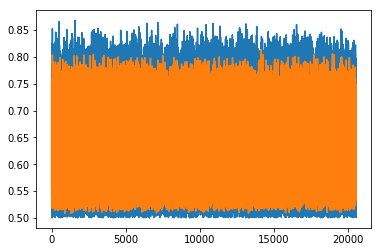

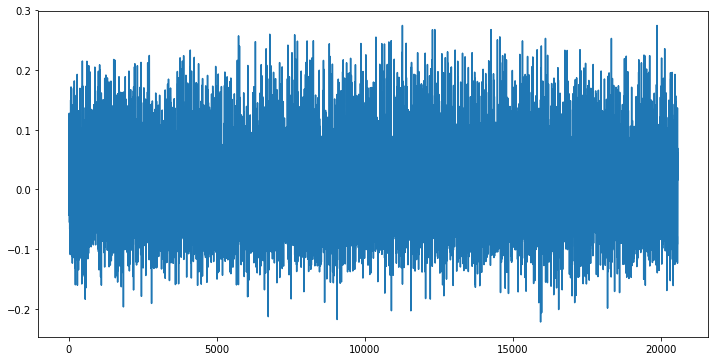

In [184]:
plt.plot(y_test['eff'].values);
plt.plot(total_design['eff'].values)
fig = plt.figure(figsize=(12,6))
plt.plot(total_design['eff'].values-y_test['eff'].values)
print(total_design['eff'].values-y_test['eff'].values<0.05)
good_prediction= sum(np.abs(total_design['eff'].values-y_test['eff'].values)<0.075 )
print('Number of deisgns are in accuracy range:',good_prediction)
print('percentage of designs meet the criteria:',good_prediction*100/len(y_test), '%')

In [186]:
yamaha=np.array([36000,10, 338])
yamaha_prop = model.predict(yamaha.reshape(1,-1))
predicted_design=yamaha_prop.tolist()[0]
print("predicted design:",predicted_design)
print("predicted accuracy:",yamaha_prop[0][-1]*100, '%')

predicted design: [0.29010062999999997, 0.22340523200000018, 0.25184622799999984, 0.22639161400000002, 0.233187464, 0.18751427199999987, 0.31755405999999997, 0.25418320199999994, 0.26520926, 0.0020000000000000013, 2.2236829999999994, 0.37802700000000017, 0.6421810000000001]
predicted accuracy: 64.2181 %


In [187]:
design=[]
design=(yamaha.tolist())
design.extend(predicted_design[10:12])
design.extend(predicted_design[0:10])


In [188]:
eng = matlab.engine.start_matlab()

tf = eng.OpenProp_eval(matlab.double(design))
#OpenProp: th,Vs,rpm,D,Dhub,Cd1,cd2,cd3,cd4,cd5,cd6,cd7,cd8,cd9,cd10,eff
print('Original accuracy:',tf*100,'%')  

Original accuracy: 61.185334537502314 %


In [20]:
eng.quit()

In [105]:
design=[186250,7.88,5500,0.4102656, 0.06974486,0.22352285,0.25243854, 0.29040764, 0.26015193, 0.29744894, 0.18893996,0.25311826 ,0.27542467, 0.16335884 ,0.002, 0.601519];
max_eval_track=[]
def take_rand_steps(design):
 max_step_size=0.1; steps=[]
 dimension=[2,3,4,5,6,7,8];
 designs=np.tile(design, (len(dimensions),1))
 #print(designs)
 for i in range(len(dimension)):
   rand_step=max_step_size*np.random.random_sample() 
   designs[i][6+i]=designs[i][6+i]+rand_step
 #print(designs)
 return designs

def eval_designs(new_designs):
 eval=[];
 for i in range(len(new_designs)):
    #print(new_designs[i].tolist())
    tf = eng.OpenProp_eval(matlab.double(new_designs[i].tolist()))
    eval.append(tf)
    #print(eval)
 maxpos = eval.index(max(eval)) 
 print(eval[maxpos])
 max_eval_track.append(eval[maxpos])
 return new_designs[maxpos]
    

In [106]:
for i in range(200):
 new_designs=take_rand_steps(design)
 design = eval_designs(new_designs)

0.5862877796997779
0.5860910233883739
0.5858980938748196
0.58563106827216
0.5855524187674788
0.5855316966776074
0.5854437070203398
0.5853037573207782
0.5846340278888632
0.583946137486802
0.5833944922386489
0.5832475314919721
0.5825194034269673
0.5820120948058726
0.5817423766240315
0.5809021207539893
0.5801512596204105
0.5800174702844619
0.5797996422246433
0.5795829440918261
0.5792514510486833
0.5791859244259854
0.5791763835349599
0.5782311738547733
0.5774881916982545
0.5762776252330915
0.5758311550634757
0.5756753811241326
0.5756677254458418
0.575000640552802
0.5748693390827613
0.5747409070259553
0.5745291748673192
0.5741188872511966
0.5733045229102236
0.5730032469747576
0.5724117515154786
0.5720684079149424
0.5718632161859696
0.5717552233882538
0.5715767646130465
0.5712205359716139
0.5711513093964301
0.5708544525985503
0.5706523699133278
0.5705995329097013
0.5705358424527969
0.5696547685842405
0.5694509188102014
0.5690219589136758
0.5687357142402695
0.5683954361062361
0.56828808259805

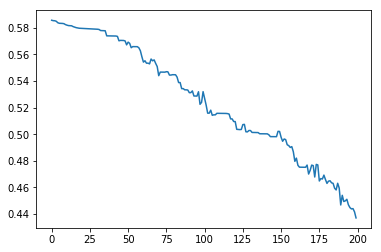

In [99]:
plt.plot(max_eval_track)